# Example plotting script for model output in this repository
This script produces hovmoller plots of temperature, stratification (as squared buoyancy frequency), turbulent kinetic energy (TKE) ant timeseries of melt rate, similar to those found in Rosevear et al. (2020) The role of double-diffusive convection in the basal melting of Antarctic ice shelves. 

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo


In [24]:
### read in from NetCDF
# choose directory for experiment. Directories correspond to the experiment names in Rosevear et al. (2020). 
# Options are A1, B1, C1, C2& D1
datastr = "./A1/"
fname = '%sOUTPUT_light.nc'% datastr
    
ds = xr.open_dataset(fname)

In [31]:
## Calculate meltrate

# parameters from simulations
nu = 2.0e-6 #molecular viscosity (m^2 s^-1)
Pr = 14 #Prandtl number (dimensionles)
L = 3.35e5 # Latent heat of melting (units)
cp = 4.184e3 # Heat capacity of the ocean (units)
sy = 365*24*3600

dtdz = (ds.Temp[:,1]-ds.Temp[:,0])/(ds.y[1]-ds.y[0])
V = -(cp/L)*(nu/Pr)*(1/0.92)*dtdz*sy


meltrate = -V;
    


Text(0.5, 0, '$t$ (h)')

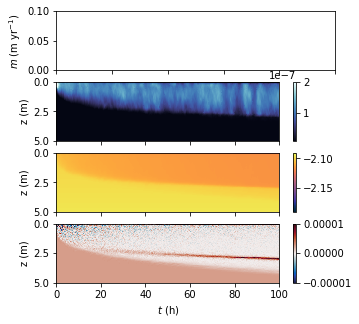

In [33]:
## not up to scratch with xarray for plotting, so back to the usual tricks
ymax = 5
Tmax = 100
T = 3600

time  = ds.t-ds.t[0]
N_squared = ds.N2
temp = ds.Temp
tke = ds.TKE
y = ds.y

### plot
f, ax = plt.subplots(4,1) 
f.set_size_inches(5, 5)

#cf = ax[0].plot(time/T, meltrate[:-1:dT],'-k')
ch = ax[1].pcolor(time/T, y, ds.TKE.transpose(), cmap=cmo.ice,  vmin=1e-8, vmax =2e-7)
ci = ax[2].pcolor(time/T, y, temp.transpose(), cmap=cmo.thermal,  vmin=np.min(temp[2:-1,2:-1]), 
                  vmax =np.max(temp[5:-1,5:-1]))
cj = ax[3].pcolor(time/3600, y, N_squared.transpose(), cmap=cmo.balance, vmin = -1e-5, vmax =1e-5)

f.colorbar(ch, ax=ax[1])
f.colorbar(ci, ax=ax[2])
f.colorbar(cj, ax=ax[3])

ax[0].axis([0, Tmax,  0 , 0.1])
ax[0].set_ylabel("$m$ (m yr$^{-1}$)")
ax[0].set_xticklabels([''])

ax[1].axis([0, Tmax, ymax, 0 ])
ax[1].set_ylabel("z (m)")
ax[1].set_xticklabels([''])

ax[2].axis([0, Tmax, ymax, 0 ])
ax[2].set_ylabel("z (m)")
ax[2].set_xticklabels([''])

ax[3].axis([0, Tmax, ymax, 0 ])
ax[3].set_ylabel("z (m)")
ax[3].set_xlabel('$t$ (h)')


In [32]:
meltrate

<xarray.DataArray (t: 844)>
array([0.      , 0.856249, 0.545696, ..., 0.024926, 0.024919, 0.024912])
Coordinates:
  * t        (t) float64 0.0 799.7 1.8e+03 ... 7.565e+05 7.575e+05 7.58e+05